# Reproducing One-Zone Model Results from Palicio et al. (2023)

In [1]:
import vice
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

## Model Parameters

### Simulation Time

In [2]:
dt = 0.01
tmax = 13.8
simtime = np.arange(0, tmax+dt, dt) # Gyr

### Yields

In [3]:
vice.yields.ccsne.settings['o'] = 1.022e-2
vice.yields.ccsne.settings['si'] = 8.5e-4
vice.yields.ccsne.settings['fe'] = 0.0014
from vice.yields.sneia import iwamoto99

### DTDs

In [4]:
sys.path.append(os.path.abspath('../migration'))
from src.simulations import dtds

In [8]:
MR01 = dict(
    name = 'MR01',
    RIa = dtds.greggio05_single(tmin=0.03, tmax=tmax),
    delay = 0.03
)
S05 = dict(
    name = 'S05',
    RIa = dtds.utils.gaussian(center=3.4, stdev=0.68),
    delay = 0.25
)
G05_WIDE = dict(
    name = 'WIDE G05',
    RIa = dtds.greggio05_approximate.from_defaults('wide', tmin=0.04, tmax=tmax),
    delay = 0.04
)
G05_CLOSE = dict(
    name = 'CLOSE G05',
    RIa = dtds.greggio05_approximate.from_defaults('close', tmin=0.04, tmax=tmax),
    delay = 0.04
)
MPV06 = dict(
    name = 'MPV06',
    RIa = dtds.prompt(peak=0.05, stdev=0.01, timescale=3, tmin=0.03, tmax=10.05),
    delay = 0.03
)
T08 = dict(
    name = 'T08',
    RIa = dtds.powerlaw(slope=-1, tmin=0.1, tmax=10),
    delay = 0.1
)
P08 = dict(
    name = 'P08',
    RIa = dtds.powerlaw(slope=-0.5, tmin=0.03, tmax=tmax),
    delay = 0.03
)

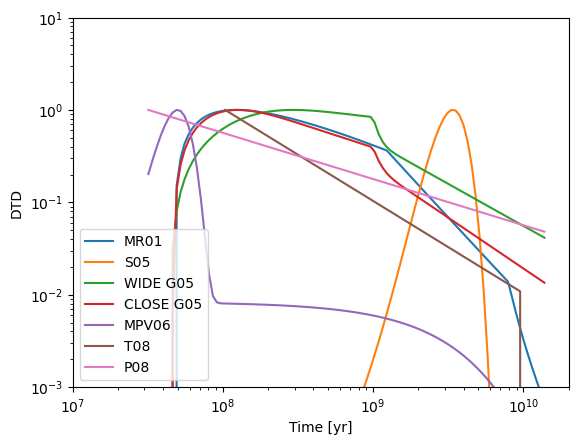

In [18]:
tarr = np.logspace(np.log10(0.03), np.log10(tmax), 100)

fig, ax = plt.subplots()
for dtd in [MR01, S05, G05_WIDE, G05_CLOSE, MPV06, T08, P08]:
    func = dtd['RIa']
    x = tarr[tarr >= dtd['delay']]
    y = np.array([func(t) for t in x])
    y /= y.max()
    ax.plot(x * 1e9, y, label=dtd['name'])
ax.set_xscale('log')
ax.set_xlabel('Time [yr]')
ax.set_xlim((1e7, 2e10))
ax.set_ylabel('DTD')
ax.set_yscale('log')
ax.set_ylim((1e-3, 10))
ax.legend()
plt.show()

### Other Parameters

They do include outflows, although with a mass-loading factor $\eta=0.4$ which is much less than in Johnson et al. (2021).

In [7]:

params = dict(
    elements=('fe', 'si', 'o'),
    mode='ifr',
    dt=dt,
    eta=0.4,
    Mg0=0,
    imf='kroupa',
    recycling=0.285,
    tau_star=2,
    enhancement=1,
    Zin=0,
)

## One Infall